In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [93]:
pd.set_option('display.max_columns', None)

In [94]:
df = pd.read_csv('gurgaon_properties_cleaned_v2.csv').drop_duplicates()

In [95]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,signature global grand iva,sector 103,0.50,6667.0,750.0,Built Up area: 750 (69.68 sq.m.)Carpet area: 6...,2,2,0,10.0,North,Undefined,NaN,750.0,605.0,0,0,0,0,0,1,0
1,flat,dlf icon,sector 43,5.80,20707.0,2801.0,Built Up area: 2801 (260.22 sq.m.),4,4,3+,18.0,NaN,Undefined,NaN,2801.0,NaN,0,0,0,0,0,1,0
2,house,independent,sector 11,1.35,3857.0,3500.0,Plot area 3500(325.16 sq.m.),10,6,3+,3.0,NaN,Old Property,NaN,3500.0,NaN,0,0,0,0,0,1,0
3,flat,m3m skywalk,sector 74,1.55,13790.0,1124.0,Super Built up area 1406(130.62 sq.m.)Built Up...,2,2,3+,18.0,South,Relatively New,1406.0,1300.0,1124.0,0,0,0,0,1,1,137
4,house,dlf city phase 1,sector 26,5.50,30556.0,1800.0,Plot area 200(167.23 sq.m.),4,4,3,2.0,North-East,Moderately Old,NaN,1800.0,NaN,1,1,0,1,0,1,69


In [96]:
df.shape

(3678, 23)

In [97]:
df.columns

Index(['property_type', 'society', 'sector', 'price', 'price_per_sqft', 'area',
       'areaWithType', 'bedRoom', 'bathroom', 'balcony', 'floorNum', 'facing',
       'agePossession', 'super_built_up_area', 'built_up_area', 'carpet_area',
       'study room', 'servant room', 'store room', 'pooja room', 'others',
       'furnishing_type', 'luxury_score'],
      dtype='object')

C:\Users\HP\AppData\Local\Temp\ipykernel_12008\2797181776.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'])


<Axes: xlabel='price', ylabel='Density'>

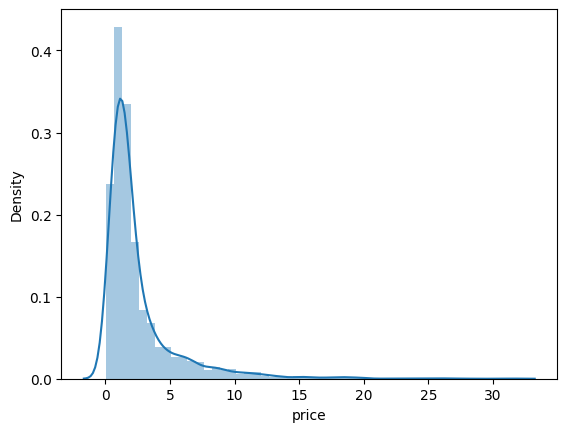

In [98]:
# outliers on the basis of price column
sns.distplot(df['price'])

<Axes: xlabel='price'>

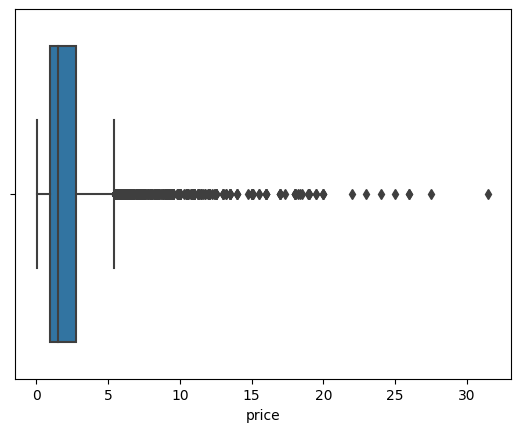

In [99]:
sns.boxplot(x=df['price'])

In [100]:
# Calculate the IQR for the 'price' column
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]

# Displaying the number of outliers and some statistics
num_outliers = outliers.shape[0]
outliers_price_stats = outliers['price'].describe()

num_outliers, outliers_price_stats

(425,
 count    425.000000
 mean       9.235624
 std        4.065259
 min        5.460000
 25%        6.460000
 50%        8.000000
 75%       10.750000
 max       31.500000
 Name: price, dtype: float64)

In [101]:
outliers.sort_values('price',ascending=False).head(20)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
3568,house,arjun marg/ sector- 26 phase- 1/ golf course road,sector 26,31.50,35000.0,9000.0,Plot area 1000(836.13 sq.m.),7,9,3+,3.0,North-East,Moderately Old,NaN,9000.0,NaN,1,1,1,1,0,2,74
1156,house,independent,sector 43,27.50,24366.0,11286.0,Plot area 1254(1048.5 sq.m.),6,7,3+,3.0,North-East,Relatively New,NaN,11286.0,NaN,1,1,0,1,1,0,42
3213,house,dlf city plots,sector 26,26.00,57206.0,4545.0,Plot area 505(422.24 sq.m.),6,7,3+,2.0,North-East,New Property,NaN,4545.0,NaN,1,1,0,1,1,0,138
2504,house,independent,sector 26,26.00,82540.0,3150.0,Plot area 402(336.12 sq.m.)Built Up area: 400 ...,16,16,3+,4.0,North-West,New Property,NaN,400.0,350.0,1,1,1,1,0,2,72
2767,house,suncity township,sector 54,25.00,31111.0,8036.0,Plot area 1000(836.13 sq.m.),4,4,3+,2.0,North,Moderately Old,NaN,1000.0,NaN,1,1,1,1,0,1,0
3155,house,emaar the palm springs,sector 54,24.00,600000.0,400.0,Plot area 400(37.16 sq.m.),5,5,2,1.0,North-East,Old Property,NaN,400.0,NaN,1,1,0,1,0,0,122
321,house,independent,sector 26,23.00,25556.0,9000.0,Plot area 1000(836.13 sq.m.),4,4,3+,2.0,South-West,Relatively New,NaN,9000.0,NaN,1,1,1,1,0,0,145
3731,house,vipul tatvam villa,sector 48,22.00,26667.0,8250.0,Plot area 1000(836.13 sq.m.),5,6,3,3.0,NaN,Moderately Old,NaN,1000.0,NaN,0,1,0,0,0,1,54
1258,house,luxury dlf city floors,sector 26,20.00,48889.0,4091.0,Plot area 500(418.06 sq.m.),16,16,3+,4.0,NaN,New Property,NaN,500.0,NaN,0,1,0,0,0,0,31
1608,house,dlf city plots,sector 26,20.00,44265.0,4518.0,Plot area 502(419.74 sq.m.),16,20,3+,4.0,North-East,New Property,NaN,4518.0,NaN,1,1,1,1,0,0,153


In [102]:
# on the basis of price col we can say that there are some genuine outliers but there are some data erros as well

### Price_per_sqft

C:\Users\HP\AppData\Local\Temp\ipykernel_12008\2186227091.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price_per_sqft'])


<Axes: xlabel='price_per_sqft', ylabel='Density'>

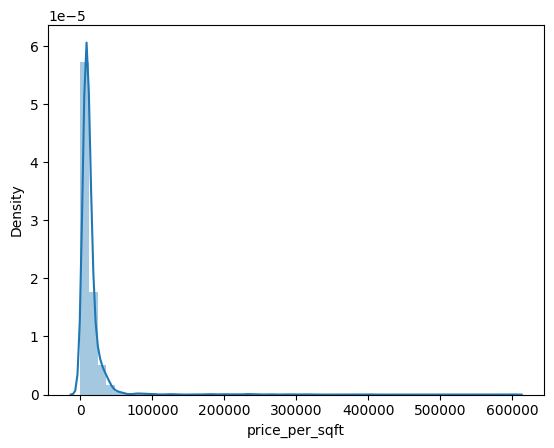

In [103]:
sns.distplot(df['price_per_sqft'])

<Axes: xlabel='price_per_sqft'>

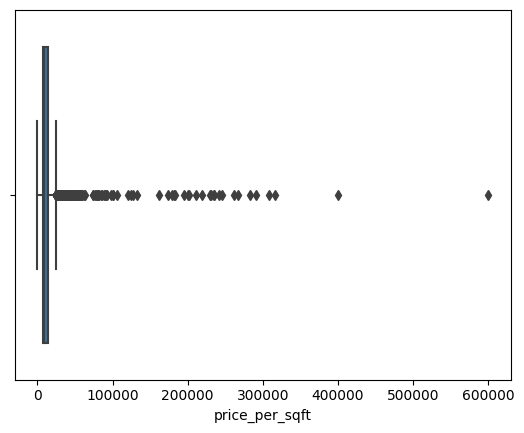

In [104]:
sns.boxplot(x=df['price_per_sqft'])

In [105]:
# Calculate the IQR for the 'price' column
Q1 = df['price_per_sqft'].quantile(0.25)
Q3 = df['price_per_sqft'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers_sqft = df[(df['price_per_sqft'] < lower_bound) | (df['price_per_sqft'] > upper_bound)]

# Displaying the number of outliers and some statistics
num_outliers = outliers_sqft.shape[0]
outliers_sqft_stats = outliers_sqft['price_per_sqft'].describe()

num_outliers, outliers_sqft_stats

(353,
 count       353.000000
 mean      52672.226629
 std       61218.883253
 min       24500.000000
 25%       28233.000000
 50%       33404.000000
 75%       42032.000000
 max      600000.000000
 Name: price_per_sqft, dtype: float64)

In [106]:
outliers_sqft['area'] = outliers_sqft['area'].apply(lambda x:x*9 if x<1000 else x)

C:\Users\HP\AppData\Local\Temp\ipykernel_12008\205471443.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_sqft['area'] = outliers_sqft['area'].apply(lambda x:x*9 if x<1000 else x)


In [107]:
outliers_sqft['price_per_sqft'] = round((outliers_sqft['price']*10000000)/outliers_sqft['area'])

C:\Users\HP\AppData\Local\Temp\ipykernel_12008\3686006548.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_sqft['price_per_sqft'] = round((outliers_sqft['price']*10000000)/outliers_sqft['area'])


In [108]:
outliers_sqft['price_per_sqft'].describe()

count      353.000000
mean     29371.696884
std      12417.964865
min       2723.000000
25%      25562.000000
50%      29880.000000
75%      35556.000000
max      82540.000000
Name: price_per_sqft, dtype: float64

In [109]:
df.update(outliers_sqft)

C:\Users\HP\AppData\Local\Temp\ipykernel_12008\2186227091.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price_per_sqft'])


<Axes: xlabel='price_per_sqft', ylabel='Density'>

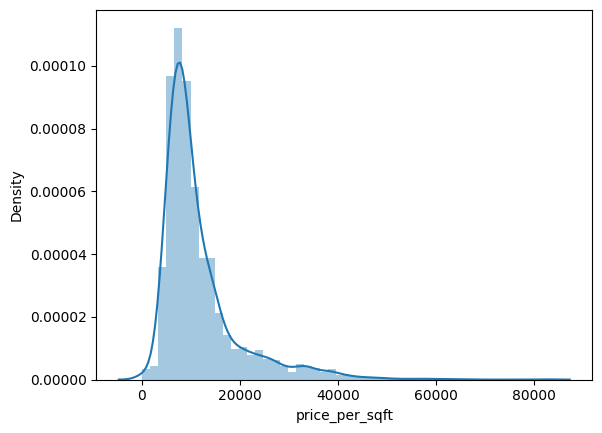

In [110]:
sns.distplot(df['price_per_sqft'])

<Axes: xlabel='price_per_sqft'>

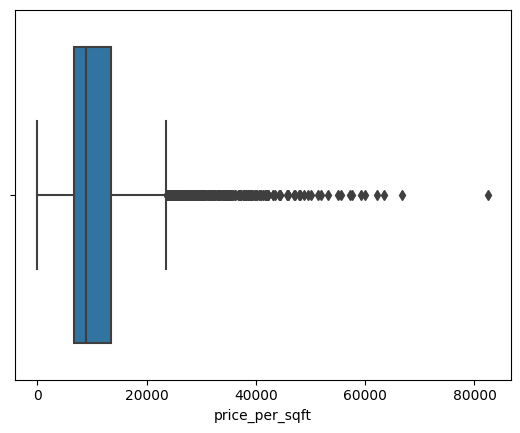

In [111]:
sns.boxplot(x=df['price_per_sqft'])

In [112]:
df[df['price_per_sqft']>50000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
145,house,cloudnine cottages,sohna road road,5.50,55000.0,1000.0,Plot area 1000(92.9 sq.m.),3,3,0,1.0,NaN,Moderately Old,NaN,1000.0,NaN,0,0,0,0,0,1,0
312,house,independent,sector 25,16.00,59259.0,2700.0,Plot area 350(292.64 sq.m.)Built Up area: 325 ...,16,16,3+,4.0,West,New Property,NaN,325.0,300.0,1,1,1,1,0,2,72
594,house,emaar mgf marbella,sector 66,18.00,55556.0,3240.0,Plot area 360(301.01 sq.m.),4,4,3+,3.0,East,Moderately Old,NaN,3240.0,NaN,1,1,0,1,0,2,75
1138,flat,unitech vistas,sector 70,9.00,57508.0,1565.0,Built Up area: 1565 (145.39 sq.m.),3,3,0,7.0,NaN,Undefined,NaN,1565.0,NaN,0,0,0,0,0,1,0
1378,house,unitech escape,sector 50,10.80,60000.0,1800.0,Plot area 290(242.48 sq.m.)Built Up area: 250 ...,4,4,3,2.0,North,Relatively New,NaN,250.0,200.0,1,1,1,1,0,0,103
1536,house,malibu towne,sector 47,8.50,53125.0,1600.0,Built Up area: 1600 (148.64 sq.m.),12,12,3+,4.0,North,New Property,NaN,1600.0,NaN,0,0,0,0,0,0,99
1871,house,nul,sector 28,12.50,51440.0,2430.0,Plot area 270(225.75 sq.m.),16,17,3+,4.0,South,Relatively New,NaN,2430.0,NaN,1,1,0,1,1,2,137
2504,house,independent,sector 26,26.00,82540.0,3150.0,Plot area 402(336.12 sq.m.)Built Up area: 400 ...,16,16,3+,4.0,North-West,New Property,NaN,400.0,350.0,1,1,1,1,0,2,72
2943,house,project housing board colony,sector 31,8.00,63492.0,1260.0,Built Up area: 140 (117.06 sq.m.),2,1,0,1.0,NaN,Undefined,NaN,140.0,NaN,0,0,0,0,0,1,0
3155,house,emaar the palm springs,sector 54,24.00,66667.0,3600.0,Plot area 400(37.16 sq.m.),5,5,2,1.0,North-East,Old Property,NaN,400.0,NaN,1,1,0,1,0,0,122


In [113]:
df = df[df['price_per_sqft'] <= 50000]

<Axes: xlabel='price_per_sqft'>

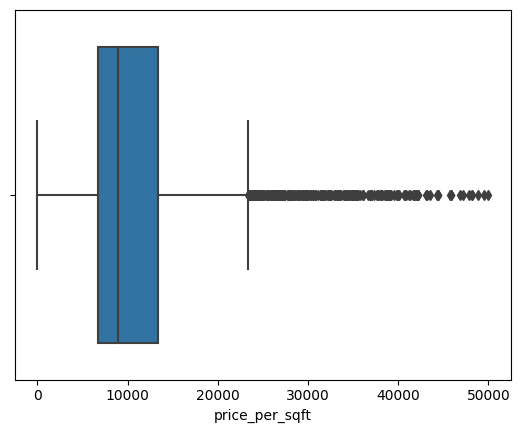

In [114]:
sns.boxplot(x=df['price_per_sqft'])

### Area

C:\Users\HP\AppData\Local\Temp\ipykernel_12008\91062565.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['area'])


<Axes: xlabel='area', ylabel='Density'>

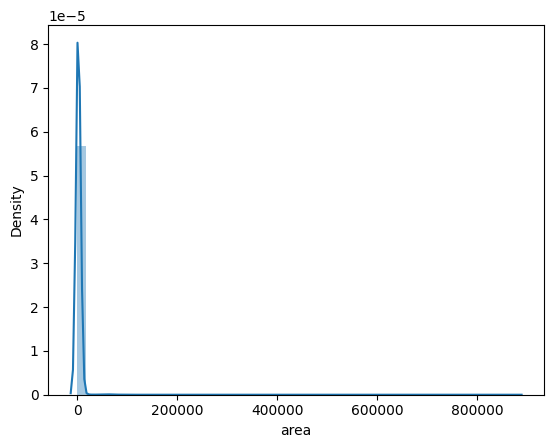

In [115]:
sns.distplot(df['area'])

<Axes: xlabel='area'>

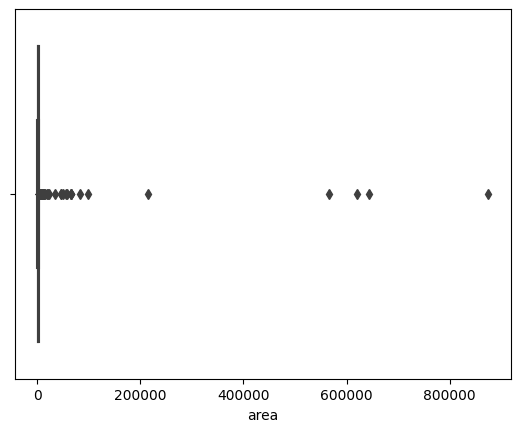

In [116]:
sns.boxplot(x=df['area'])

In [117]:
df['area'].describe()

count      3648.000000
mean       2947.362390
std       23205.022321
min         145.000000
25%        1262.000000
50%        1750.000000
75%        2350.000000
max      875000.000000
Name: area, dtype: float64

In [118]:
df[df['area'] > 100000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
447,house,independent,sector 50,5.00,232.0,215517.0,Plot area 2(1011.71 sq.m.),6,5,3+,2.0,NaN,New Property,NaN,2.0,NaN,1,1,0,1,1,0,0
670,flat,ramsons kshitij,sector 95,0.31,5.0,620000.0,Carpet area: 607936 (56479.1 sq.m.),2,2,1,1.0,North-East,Relatively New,NaN,NaN,607936.0,1,0,0,0,1,1,65
2450,flat,signature global solera 2,sector 107,0.51,9.0,566667.0,Carpet area: 514396 (47788.95 sq.m.),2,2,1,3.0,North,New Property,NaN,NaN,514396.0,0,0,0,0,0,1,44
2526,flat,signature the roselia,sector 95,0.45,7.0,642857.0,Carpet area: 569243 (52884.41 sq.m.),2,2,2,2.0,South-West,New Property,NaN,NaN,569243.0,0,0,0,0,0,1,76
3693,flat,hcbs sports ville,sohna road,0.35,4.0,875000.0,Built Up area: 737147 (68483.2 sq.m.),2,2,2,8.0,NaN,Relatively New,NaN,737147.0,NaN,0,0,0,0,0,2,44


In [119]:
df = df[df['area'] < 100000]

C:\Users\HP\AppData\Local\Temp\ipykernel_12008\91062565.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['area'])


<Axes: xlabel='area', ylabel='Density'>

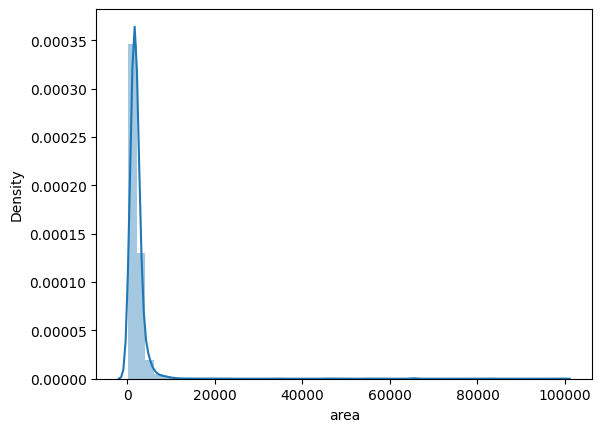

In [120]:
sns.distplot(df['area'])

<Axes: xlabel='area'>

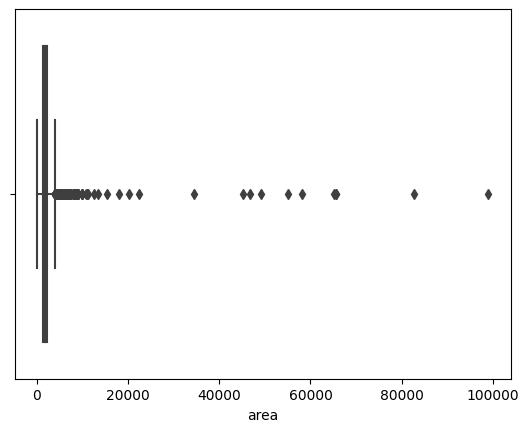

In [121]:
sns.boxplot(x=df['area'])

In [122]:
df[df['area'] > 10000].sort_values('area',ascending=False)

# 818, 1796, 1123, 2, 2356, 115, 3649, 2503, 1471

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
2749,house,independent,sector 26,18.40,1859.0,98978.0,Plot area 502(419.74 sq.m.)Carpet area: 11000 ...,6,8,3+,4.0,South,Relatively New,NaN,NaN,11000.00,0,1,1,1,0,0,60
3420,house,ganpati heights apartment,sector 13,1.25,151.0,82781.0,Plot area 115(7692.86 sq.m.),10,6,2,3.0,South-East,Old Property,NaN,115.0,NaN,0,0,0,0,1,1,7
1967,flat,rof ananda,sector 95,0.38,58.0,65517.0,Carpet area: 64529 (5994.94 sq.m.),2,2,2,10.0,East,New Property,NaN,NaN,64529.00,1,0,0,0,0,1,15
741,flat,rof ananda,sector 95,0.38,58.0,65517.0,Carpet area: 64412 (5984.07 sq.m.),3,2,1,12.0,North,Relatively New,NaN,NaN,64412.00,0,0,0,0,0,1,51
2990,house,dlf city plot phase 4,sector 28,13.00,1992.0,65261.0,Carpet area: 7250 (6061.92 sq.m.),10,10,3+,1.0,NaN,Undefined,NaN,NaN,7250.00,0,0,0,0,0,1,0
94,flat,pyramid elite,sector 86,0.46,79.0,58228.0,Carpet area: 58141 (5401.48 sq.m.),2,2,1,0.0,NaN,Under Construction,NaN,NaN,58141.00,0,0,0,0,0,1,15
916,flat,rof ananda,sector 37,0.33,60.0,55000.0,Carpet area: 54917 (5101.96 sq.m.),2,2,1,13.0,South-West,Relatively New,NaN,NaN,54917.00,0,0,0,0,0,1,37
1329,flat,signature the serenas,sohna road,0.28,57.0,49123.0,Carpet area: 48811 (4534.69 sq.m.),1,1,2,1.0,North-West,Relatively New,NaN,NaN,48811.00,1,0,0,0,0,1,37
166,house,independent,sector 25,7.30,1560.0,46795.0,Plot area 215(179.77 sq.m.)Built Up area: 5800...,9,9,2,3.0,North-West,Relatively New,NaN,5800.0,5200.00,0,1,1,0,0,0,109
2889,flat,ramsons kshitij,sector 95,0.24,53.0,45283.0,Carpet area: 45966 (4270.38 sq.m.),2,2,1,10.0,North-West,Relatively New,NaN,NaN,45966.00,0,0,0,0,1,1,33


In [123]:
df.drop(index=[818, 1796, 1123, 2, 2356, 115, 3649, 2503, 1471], inplace=True)

In [124]:
df[df['area'] > 10000].sort_values('area',ascending=False)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
2749,house,independent,sector 26,18.40,1859.0,98978.0,Plot area 502(419.74 sq.m.)Carpet area: 11000 ...,6,8,3+,4.0,South,Relatively New,NaN,NaN,11000.00,0,1,1,1,0,0,60
3420,house,ganpati heights apartment,sector 13,1.25,151.0,82781.0,Plot area 115(7692.86 sq.m.),10,6,2,3.0,South-East,Old Property,NaN,115.0,NaN,0,0,0,0,1,1,7
1967,flat,rof ananda,sector 95,0.38,58.0,65517.0,Carpet area: 64529 (5994.94 sq.m.),2,2,2,10.0,East,New Property,NaN,NaN,64529.00,1,0,0,0,0,1,15
741,flat,rof ananda,sector 95,0.38,58.0,65517.0,Carpet area: 64412 (5984.07 sq.m.),3,2,1,12.0,North,Relatively New,NaN,NaN,64412.00,0,0,0,0,0,1,51
2990,house,dlf city plot phase 4,sector 28,13.00,1992.0,65261.0,Carpet area: 7250 (6061.92 sq.m.),10,10,3+,1.0,NaN,Undefined,NaN,NaN,7250.00,0,0,0,0,0,1,0
94,flat,pyramid elite,sector 86,0.46,79.0,58228.0,Carpet area: 58141 (5401.48 sq.m.),2,2,1,0.0,NaN,Under Construction,NaN,NaN,58141.00,0,0,0,0,0,1,15
916,flat,rof ananda,sector 37,0.33,60.0,55000.0,Carpet area: 54917 (5101.96 sq.m.),2,2,1,13.0,South-West,Relatively New,NaN,NaN,54917.00,0,0,0,0,0,1,37
1329,flat,signature the serenas,sohna road,0.28,57.0,49123.0,Carpet area: 48811 (4534.69 sq.m.),1,1,2,1.0,North-West,Relatively New,NaN,NaN,48811.00,1,0,0,0,0,1,37
166,house,independent,sector 25,7.30,1560.0,46795.0,Plot area 215(179.77 sq.m.)Built Up area: 5800...,9,9,2,3.0,North-West,Relatively New,NaN,5800.0,5200.00,0,1,1,0,0,0,109
2889,flat,ramsons kshitij,sector 95,0.24,53.0,45283.0,Carpet area: 45966 (4270.38 sq.m.),2,2,1,10.0,North-West,Relatively New,NaN,NaN,45966.00,0,0,0,0,1,1,33


In [125]:
df.loc[48,'area'] = 115*9
df.loc[300,'area'] = 7250
df.loc[2666,'area'] = 5800
df.loc[1358,'area'] = 2660
df.loc[3195,'area'] = 2850
df.loc[2131,'area'] = 1812
df.loc[3088,'area'] = 2160
df.loc[3444,'area'] = 1175

C:\Users\HP\AppData\Local\Temp\ipykernel_12008\91062565.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['area'])


<Axes: xlabel='area', ylabel='Density'>

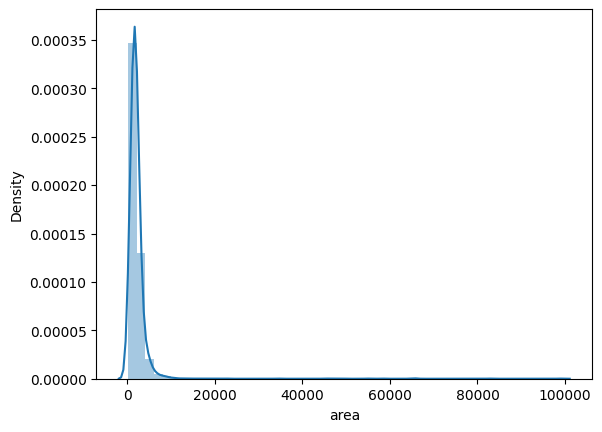

In [126]:
sns.distplot(df['area'])

<Axes: xlabel='area'>

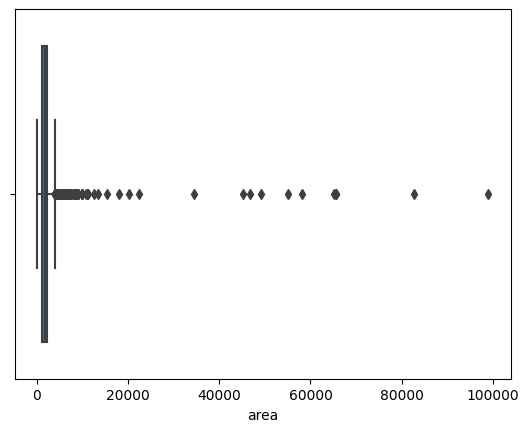

In [127]:
sns.boxplot(x=df['area'])

In [128]:
df['area'].describe()

count     3635.000000
mean      2150.588996
std       3628.007883
min        145.000000
25%       1261.000000
50%       1750.000000
75%       2340.500000
max      98978.000000
Name: area, dtype: float64

### Bedroom

C:\Users\HP\AppData\Local\Temp\ipykernel_12008\1691983684.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bedRoom'])


<Axes: xlabel='bedRoom', ylabel='Density'>

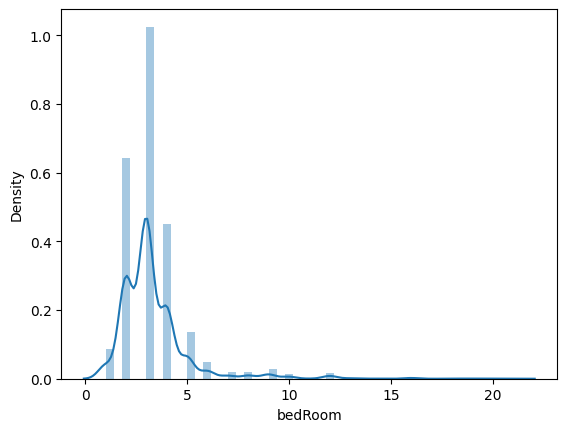

In [129]:
sns.distplot(df['bedRoom'])

<Axes: xlabel='bedRoom'>

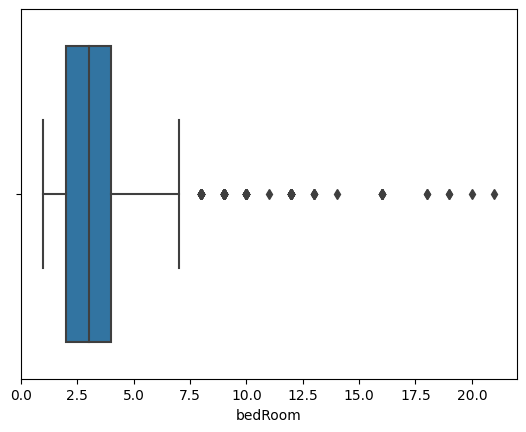

In [130]:
sns.boxplot(x=df['bedRoom'])

In [131]:
df['bedRoom'].describe()

count    3634.000000
mean        3.329389
std         1.828207
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        21.000000
Name: bedRoom, dtype: float64

In [132]:
df[df['bedRoom'] > 10].sort_values('bedRoom',ascending=False)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
2488,house,independent,sector 54,5.00,43066.0,1161.0,Plot area 129(107.86 sq.m.),21.0,21.0,3+,5.0,North,Relatively New,NaN,1161.0,NaN,0.0,1.0,0.0,0.0,0.0,2.0,49.0
70,house,independent,sector 43,4.50,39062.0,1152.0,Plot area 128(107.02 sq.m.),20.0,20.0,3+,4.0,East,Relatively New,NaN,1152.0,NaN,0.0,1.0,0.0,0.0,0.0,2.0,22.0
96,house,independent,sector 17a,3.93,24214.0,1623.0,Plot area 1623(150.78 sq.m.)Built Up area: 162...,19.0,17.0,3,4.0,North-West,Relatively New,NaN,1622.0,NaN,1.0,1.0,1.0,1.0,0.0,1.0,74.0
904,house,independent,sector 17a,3.87,5160.0,7500.0,Plot area 1623(150.78 sq.m.)Built Up area: 750...,19.0,17.0,3+,5.0,North-West,Relatively New,NaN,7500.0,NaN,1.0,0.0,1.0,0.0,0.0,1.0,68.0
1681,house,independent,sector 54,5.50,38194.0,1440.0,Plot area 160(133.78 sq.m.),18.0,18.0,3+,4.0,South-West,Relatively New,NaN,1440.0,NaN,0.0,1.0,0.0,0.0,0.0,2.0,70.0
1141,house,private house,sector 55,7.05,46906.0,1503.0,Plot area 167(139.63 sq.m.),18.0,18.0,3+,4.0,North-East,Relatively New,NaN,1503.0,NaN,0.0,0.0,0.0,0.0,1.0,2.0,57.0
1919,house,independent,sector 43,13.50,50000.0,2700.0,Plot area 300(250.84 sq.m.),16.0,16.0,3+,4.0,North-West,Relatively New,NaN,2700.0,NaN,1.0,1.0,0.0,1.0,1.0,1.0,41.0
1258,house,luxury dlf city floors,sector 26,20.00,48888.0,4091.0,Plot area 500(418.06 sq.m.),16.0,16.0,3+,4.0,NaN,New Property,NaN,500.0,NaN,0.0,1.0,0.0,0.0,0.0,0.0,31.0
1608,house,dlf city plots,sector 26,20.00,44267.0,4518.0,Plot area 502(419.74 sq.m.),16.0,20.0,3+,4.0,North-East,New Property,NaN,4518.0,NaN,1.0,1.0,1.0,1.0,0.0,0.0,153.0
714,house,independent,sector 56,12.39,45889.0,2700.0,Plot area 300(250.84 sq.m.),16.0,18.0,3+,4.0,North-East,New Property,NaN,2700.0,NaN,0.0,1.0,0.0,1.0,0.0,0.0,49.0


In [133]:
df = df[df['bedRoom'] <= 10]

In [134]:
df.shape

(3589, 23)

C:\Users\HP\AppData\Local\Temp\ipykernel_12008\1691983684.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bedRoom'])


<Axes: xlabel='bedRoom', ylabel='Density'>

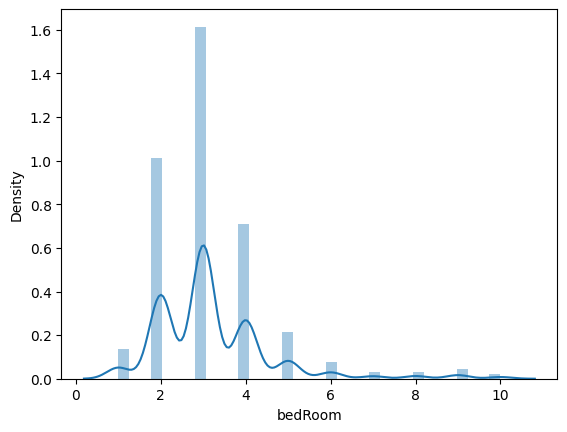

In [135]:
sns.distplot(df['bedRoom'])

<Axes: xlabel='bedRoom'>

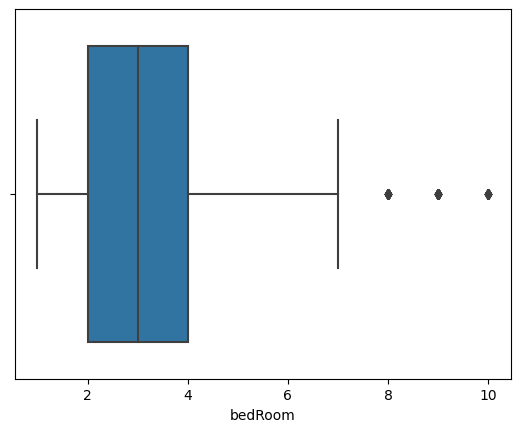

In [136]:
sns.boxplot(x=df['bedRoom'])

In [137]:
df['bedRoom'].describe()

count    3589.000000
mean        3.199498
std         1.391281
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        10.000000
Name: bedRoom, dtype: float64

### Bathroom

C:\Users\HP\AppData\Local\Temp\ipykernel_12008\2904465235.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bathroom'])


<Axes: xlabel='bathroom', ylabel='Density'>

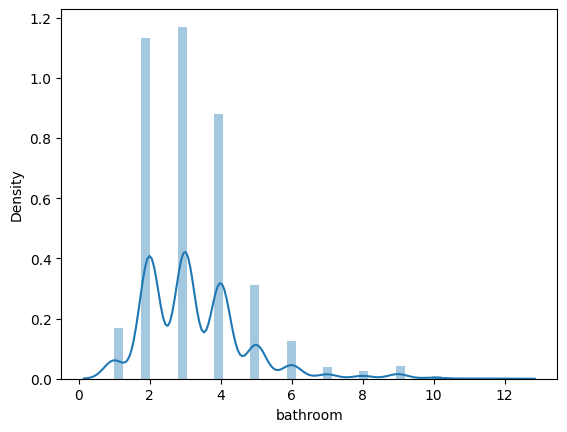

In [138]:
sns.distplot(df['bathroom'])

<Axes: xlabel='bathroom'>

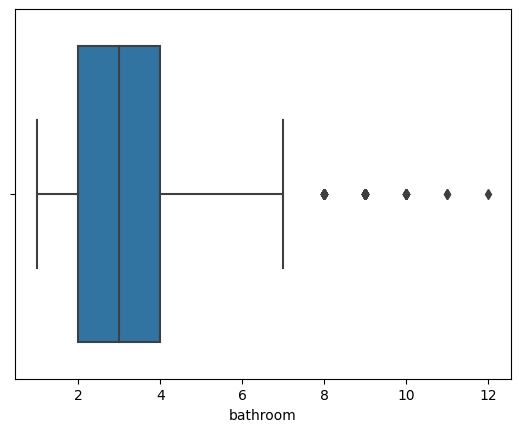

In [139]:
sns.boxplot(x=df['bathroom'])

In [140]:
df[df['bathroom'] > 10].sort_values('bathroom',ascending=False)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
3200,house,adani brahma samsara,sector 60,18.02,28200.0,6390.0,Built Up area: 6390 (593.65 sq.m.),9.0,12.0,3+,3.0,North-East,Relatively New,NaN,6390.0,NaN,0.0,1.0,0.0,0.0,0.0,0.0,146.0
1878,house,independent,sector 39,7.00,10000.0,7000.0,Plot area 350(32.52 sq.m.)Built Up area: 7000 ...,10.0,11.0,3+,4.0,South-East,Relatively New,NaN,7000.0,NaN,0.0,0.0,0.0,1.0,0.0,2.0,38.0
2268,house,independent,sector 24,11.00,28902.0,3806.0,Plot area 3806.45(353.63 sq.m.)Built Up area: ...,8.0,11.0,3+,3.0,East,Old Property,NaN,5000.0,NaN,1.0,1.0,0.0,1.0,1.0,0.0,39.0


In [141]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,signature global grand iva,sector 103,0.50,6667.0,750.0,Built Up area: 750 (69.68 sq.m.)Carpet area: 6...,2.0,2.0,0,10.0,North,Undefined,NaN,750.0,605.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,flat,dlf icon,sector 43,5.80,20707.0,2801.0,Built Up area: 2801 (260.22 sq.m.),4.0,4.0,3+,18.0,NaN,Undefined,NaN,2801.0,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,flat,m3m skywalk,sector 74,1.55,13790.0,1124.0,Super Built up area 1406(130.62 sq.m.)Built Up...,2.0,2.0,3+,18.0,South,Relatively New,1406.0,1300.0,1124.0,0.0,0.0,0.0,0.0,1.0,1.0,137.0
4,house,dlf city phase 1,sector 26,5.50,30556.0,1800.0,Plot area 200(167.23 sq.m.),4.0,4.0,3,2.0,North-East,Moderately Old,NaN,1800.0,NaN,1.0,1.0,0.0,1.0,0.0,1.0,69.0
5,flat,tulip violet,sector 69,1.55,9639.0,1608.0,Super Built up area 1608(149.39 sq.m.),3.0,3.0,2,2.0,East,Relatively New,1608.0,NaN,NaN,0.0,0.0,0.0,1.0,0.0,0.0,86.0


### super built up area

C:\Users\HP\AppData\Local\Temp\ipykernel_12008\4184943455.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['super_built_up_area'])


<Axes: xlabel='super_built_up_area', ylabel='Density'>

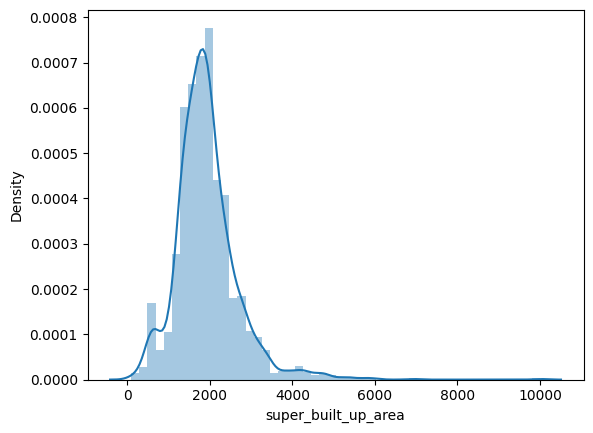

In [142]:
sns.distplot(df['super_built_up_area'])

<Axes: xlabel='super_built_up_area'>

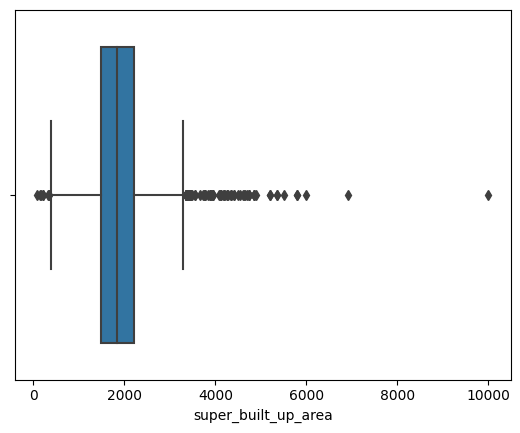

In [143]:
sns.boxplot(x=df['super_built_up_area'])

In [144]:
df['super_built_up_area'].describe()

count     1869.000000
mean      1923.952675
std        764.478023
min         89.000000
25%       1478.000000
50%       1828.000000
75%       2215.000000
max      10000.000000
Name: super_built_up_area, dtype: float64

In [145]:
df[df['super_built_up_area'] > 6000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
750,flat,bestech park view grand spa,sector 81,4.7,6786.0,6926.0,Super Built up area 6926(643.45 sq.m.),4.0,4.0,3+,19.0,North,Relatively New,6926.0,NaN,NaN,0.0,1.0,0.0,0.0,0.0,0.0,140.0
1464,flat,krrish provence estate,gwal pahari,7.5,7500.0,10000.0,Super Built up area 10000(929.03 sq.m.),5.0,6.0,3+,23.0,North-East,Relatively New,10000.0,NaN,NaN,0.0,1.0,0.0,1.0,1.0,1.0,49.0


### built up area

C:\Users\HP\AppData\Local\Temp\ipykernel_12008\3494228458.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['built_up_area'])


<Axes: xlabel='built_up_area', ylabel='Density'>

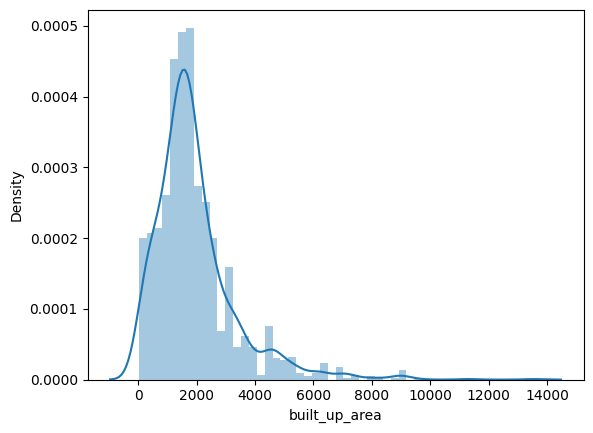

In [146]:
sns.distplot(df['built_up_area'])

<Axes: xlabel='built_up_area'>

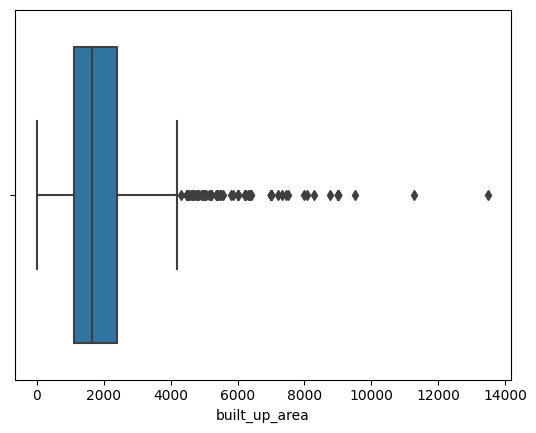

In [147]:
sns.boxplot(x=df['built_up_area'])

In [148]:
df[df['built_up_area'] > 10000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
1156,house,independent,sector 43,27.50,24366.0,11286.0,Plot area 1254(1048.5 sq.m.),6.0,7.0,3+,3.0,North-East,Relatively New,NaN,11286.0,NaN,1.0,1.0,0.0,1.0,1.0,0.0,42.0
1410,house,independent,sector 4,0.85,630.0,13492.0,Plot area 1500(1254.19 sq.m.),3.0,3.0,1,1.0,North,Relatively New,NaN,13500.0,NaN,0.0,0.0,0.0,0.0,1.0,1.0,0.0


### carpet area

C:\Users\HP\AppData\Local\Temp\ipykernel_12008\3905767603.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['carpet_area'])


<Axes: xlabel='carpet_area', ylabel='Density'>

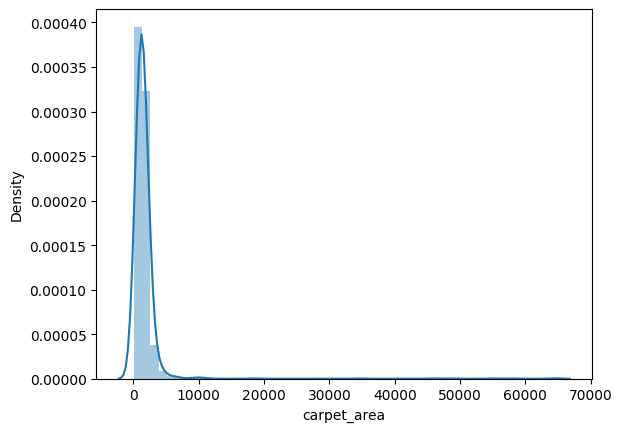

In [149]:
sns.distplot(df['carpet_area'])

<Axes: xlabel='carpet_area'>

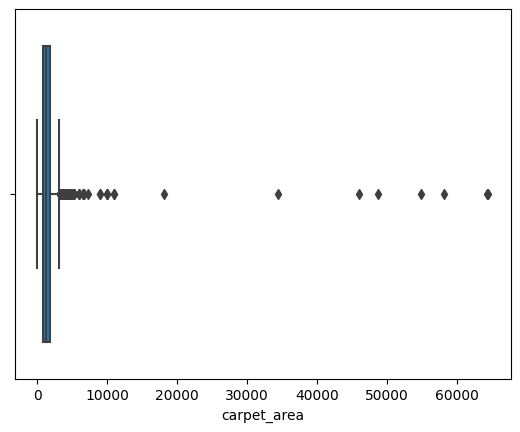

In [150]:
sns.boxplot(x=df['carpet_area'])

In [151]:
df[df['carpet_area'] > 10000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
94,flat,pyramid elite,sector 86,0.46,79.0,58228.0,Carpet area: 58141 (5401.48 sq.m.),2.0,2.0,1,0.0,NaN,Under Construction,NaN,NaN,58141.0,0.0,0.0,0.0,0.0,0.0,1.0,15.0
298,flat,rof ananda,sector 95,0.21,61.0,34426.0,Carpet area: 34401 (3195.96 sq.m.),1.0,1.0,1,13.0,North,Relatively New,NaN,NaN,34401.0,0.0,0.0,0.0,0.0,0.0,1.0,68.0
741,flat,rof ananda,sector 95,0.38,58.0,65517.0,Carpet area: 64412 (5984.07 sq.m.),3.0,2.0,1,12.0,North,Relatively New,NaN,NaN,64412.0,0.0,0.0,0.0,0.0,0.0,1.0,51.0
916,flat,rof ananda,sector 37,0.33,60.0,55000.0,Carpet area: 54917 (5101.96 sq.m.),2.0,2.0,1,13.0,South-West,Relatively New,NaN,NaN,54917.0,0.0,0.0,0.0,0.0,0.0,1.0,37.0
976,flat,godrej air,sector 85,2.50,1379.0,18129.0,Carpet area: 18122 (1683.59 sq.m.),4.0,5.0,3+,16.0,North-East,Under Construction,NaN,NaN,18122.0,1.0,0.0,0.0,1.0,1.0,0.0,44.0
1329,flat,signature the serenas,sohna road,0.28,57.0,49123.0,Carpet area: 48811 (4534.69 sq.m.),1.0,1.0,2,1.0,North-West,Relatively New,NaN,NaN,48811.0,1.0,0.0,0.0,0.0,0.0,1.0,37.0
1967,flat,rof ananda,sector 95,0.38,58.0,65517.0,Carpet area: 64529 (5994.94 sq.m.),2.0,2.0,2,10.0,East,New Property,NaN,NaN,64529.0,1.0,0.0,0.0,0.0,0.0,1.0,15.0
2749,house,independent,sector 26,18.40,1859.0,98978.0,Plot area 502(419.74 sq.m.)Carpet area: 11000 ...,6.0,8.0,3+,4.0,South,Relatively New,NaN,NaN,11000.0,0.0,1.0,1.0,1.0,0.0,0.0,60.0
2889,flat,ramsons kshitij,sector 95,0.24,53.0,45283.0,Carpet area: 45966 (4270.38 sq.m.),2.0,2.0,1,10.0,North-West,Relatively New,NaN,NaN,45966.0,0.0,0.0,0.0,0.0,1.0,1.0,33.0
3472,flat,m3m golfestate,sector 65,13.20,12000.0,11000.0,Carpet area: 11000 (1021.93 sq.m.),4.0,4.0,3,13.0,North,Moderately Old,NaN,NaN,11000.0,0.0,1.0,0.0,0.0,0.0,1.0,60.0


In [152]:
df.loc[2131,'carpet_area'] = 1812

In [153]:
df[df['carpet_area'] > 10000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
94,flat,pyramid elite,sector 86,0.46,79.0,58228.0,Carpet area: 58141 (5401.48 sq.m.),2.0,2.0,1,0.0,NaN,Under Construction,NaN,NaN,58141.0,0.0,0.0,0.0,0.0,0.0,1.0,15.0
298,flat,rof ananda,sector 95,0.21,61.0,34426.0,Carpet area: 34401 (3195.96 sq.m.),1.0,1.0,1,13.0,North,Relatively New,NaN,NaN,34401.0,0.0,0.0,0.0,0.0,0.0,1.0,68.0
741,flat,rof ananda,sector 95,0.38,58.0,65517.0,Carpet area: 64412 (5984.07 sq.m.),3.0,2.0,1,12.0,North,Relatively New,NaN,NaN,64412.0,0.0,0.0,0.0,0.0,0.0,1.0,51.0
916,flat,rof ananda,sector 37,0.33,60.0,55000.0,Carpet area: 54917 (5101.96 sq.m.),2.0,2.0,1,13.0,South-West,Relatively New,NaN,NaN,54917.0,0.0,0.0,0.0,0.0,0.0,1.0,37.0
976,flat,godrej air,sector 85,2.50,1379.0,18129.0,Carpet area: 18122 (1683.59 sq.m.),4.0,5.0,3+,16.0,North-East,Under Construction,NaN,NaN,18122.0,1.0,0.0,0.0,1.0,1.0,0.0,44.0
1329,flat,signature the serenas,sohna road,0.28,57.0,49123.0,Carpet area: 48811 (4534.69 sq.m.),1.0,1.0,2,1.0,North-West,Relatively New,NaN,NaN,48811.0,1.0,0.0,0.0,0.0,0.0,1.0,37.0
1967,flat,rof ananda,sector 95,0.38,58.0,65517.0,Carpet area: 64529 (5994.94 sq.m.),2.0,2.0,2,10.0,East,New Property,NaN,NaN,64529.0,1.0,0.0,0.0,0.0,0.0,1.0,15.0
2749,house,independent,sector 26,18.40,1859.0,98978.0,Plot area 502(419.74 sq.m.)Carpet area: 11000 ...,6.0,8.0,3+,4.0,South,Relatively New,NaN,NaN,11000.0,0.0,1.0,1.0,1.0,0.0,0.0,60.0
2889,flat,ramsons kshitij,sector 95,0.24,53.0,45283.0,Carpet area: 45966 (4270.38 sq.m.),2.0,2.0,1,10.0,North-West,Relatively New,NaN,NaN,45966.0,0.0,0.0,0.0,0.0,1.0,1.0,33.0
3472,flat,m3m golfestate,sector 65,13.20,12000.0,11000.0,Carpet area: 11000 (1021.93 sq.m.),4.0,4.0,3,13.0,North,Moderately Old,NaN,NaN,11000.0,0.0,1.0,0.0,0.0,0.0,1.0,60.0


In [154]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,signature global grand iva,sector 103,0.50,6667.0,750.0,Built Up area: 750 (69.68 sq.m.)Carpet area: 6...,2.0,2.0,0,10.0,North,Undefined,NaN,750.0,605.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,flat,dlf icon,sector 43,5.80,20707.0,2801.0,Built Up area: 2801 (260.22 sq.m.),4.0,4.0,3+,18.0,NaN,Undefined,NaN,2801.0,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,flat,m3m skywalk,sector 74,1.55,13790.0,1124.0,Super Built up area 1406(130.62 sq.m.)Built Up...,2.0,2.0,3+,18.0,South,Relatively New,1406.0,1300.0,1124.0,0.0,0.0,0.0,0.0,1.0,1.0,137.0
4,house,dlf city phase 1,sector 26,5.50,30556.0,1800.0,Plot area 200(167.23 sq.m.),4.0,4.0,3,2.0,North-East,Moderately Old,NaN,1800.0,NaN,1.0,1.0,0.0,1.0,0.0,1.0,69.0
5,flat,tulip violet,sector 69,1.55,9639.0,1608.0,Super Built up area 1608(149.39 sq.m.),3.0,3.0,2,2.0,East,Relatively New,1608.0,NaN,NaN,0.0,0.0,0.0,1.0,0.0,0.0,86.0


C:\Users\HP\AppData\Local\Temp\ipykernel_12008\3385064764.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['luxury_score'])


<Axes: xlabel='luxury_score', ylabel='Density'>

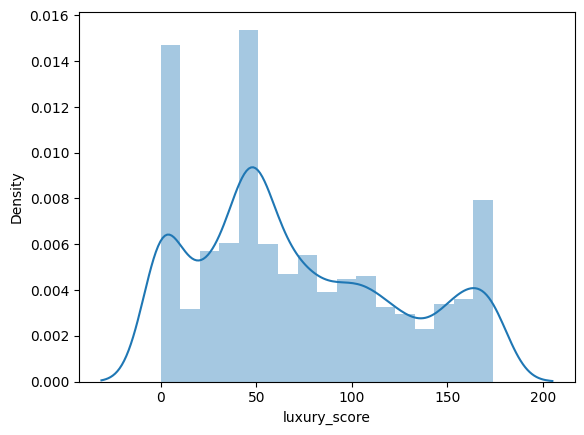

In [155]:
sns.distplot(df['luxury_score'])

<Axes: >

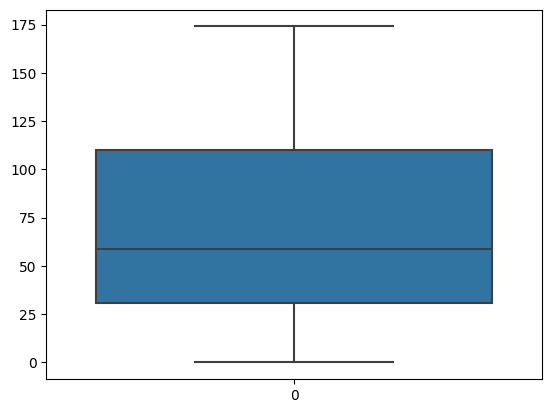

In [156]:
sns.boxplot(df['luxury_score'])

In [157]:
df.shape

(3589, 23)

In [158]:
df['price_per_sqft'] = round((df['price']*10000000)/df['area'])

In [159]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,signature global grand iva,sector 103,0.50,6667.0,750.0,Built Up area: 750 (69.68 sq.m.)Carpet area: 6...,2.0,2.0,0,10.0,North,Undefined,NaN,750.0,605.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,flat,dlf icon,sector 43,5.80,20707.0,2801.0,Built Up area: 2801 (260.22 sq.m.),4.0,4.0,3+,18.0,NaN,Undefined,NaN,2801.0,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,flat,m3m skywalk,sector 74,1.55,13790.0,1124.0,Super Built up area 1406(130.62 sq.m.)Built Up...,2.0,2.0,3+,18.0,South,Relatively New,1406.0,1300.0,1124.0,0.0,0.0,0.0,0.0,1.0,1.0,137.0
4,house,dlf city phase 1,sector 26,5.50,30556.0,1800.0,Plot area 200(167.23 sq.m.),4.0,4.0,3,2.0,North-East,Moderately Old,NaN,1800.0,NaN,1.0,1.0,0.0,1.0,0.0,1.0,69.0
5,flat,tulip violet,sector 69,1.55,9639.0,1608.0,Super Built up area 1608(149.39 sq.m.),3.0,3.0,2,2.0,East,Relatively New,1608.0,NaN,NaN,0.0,0.0,0.0,1.0,0.0,0.0,86.0


C:\Users\HP\AppData\Local\Temp\ipykernel_12008\2186227091.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price_per_sqft'])


<Axes: xlabel='price_per_sqft', ylabel='Density'>

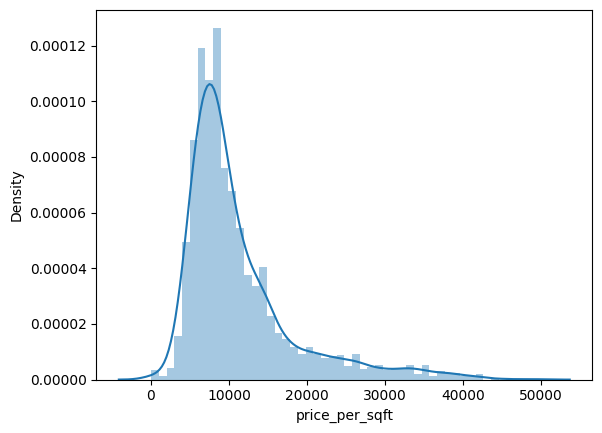

In [160]:
sns.distplot(df['price_per_sqft'])

<Axes: >

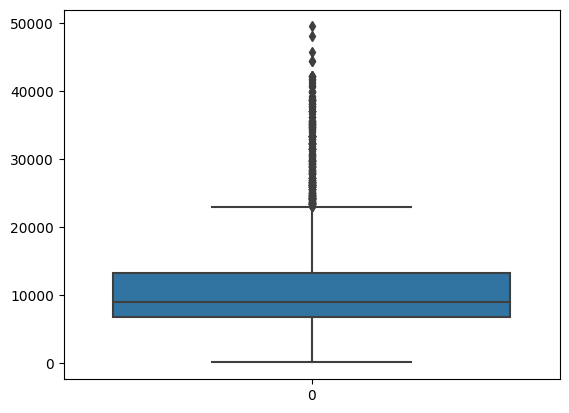

In [161]:
sns.boxplot(df['price_per_sqft'])

In [162]:
df[df['price_per_sqft'] > 42000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
95,house,independent,sector 55,5.0,44444.0,1125.0,Plot area 125(104.52 sq.m.)Built Up area: 115 ...,9.0,9.0,3+,5.0,East,New Property,NaN,115.0,100.0,0.0,0.0,0.0,0.0,1.0,0.0,44.0
333,house,independent,sector 105,9.9,49500.0,2000.0,Built Up area: 2000 (185.81 sq.m.)Carpet area:...,2.0,2.0,2,3.0,North,Undefined,NaN,2000.0,1800.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
402,house,independent,sector 28,12.0,42194.0,2844.0,Plot area 316(264.22 sq.m.),4.0,5.0,3+,4.0,East,Relatively New,NaN,2844.0,NaN,0.0,1.0,1.0,1.0,0.0,0.0,60.0
724,house,sushant lok 1 builder floors,sector 43,13.0,48148.0,2700.0,Plot area 300(250.84 sq.m.),3.0,3.0,3+,4.0,North,New Property,NaN,2700.0,NaN,0.0,0.0,0.0,1.0,0.0,0.0,7.0
1028,house,independent,sector 110,20.0,44444.0,4500.0,Plot area 500(418.06 sq.m.),5.0,7.0,3+,3.0,West,Relatively New,NaN,4500.0,NaN,0.0,1.0,0.0,1.0,0.0,2.0,97.0
1219,house,independent,sector 43,9.5,42222.0,2250.0,Plot area 302(252.51 sq.m.)Built Up area: 300 ...,5.0,5.0,3+,2.0,North-East,Relatively New,NaN,300.0,250.0,0.0,1.0,0.0,1.0,0.0,0.0,88.0
1236,house,independent,sector 26,19.0,42222.0,4500.0,Plot area 500(418.06 sq.m.),6.0,8.0,3+,3.0,East,Moderately Old,NaN,4500.0,NaN,1.0,1.0,1.0,1.0,0.0,0.0,103.0
2628,house,dlf city plots,sector 26,19.0,42054.0,4518.0,Plot area 502(419.74 sq.m.),6.0,6.0,3,2.0,East,Relatively New,NaN,4518.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,121.0
3253,house,independent,sector 25,13.0,45710.0,2844.0,Plot area 316(264.22 sq.m.),6.0,8.0,3+,NaN,NaN,Relatively New,NaN,2844.0,NaN,1.0,1.0,1.0,1.0,0.0,2.0,0.0


In [163]:
x = df[df['price_per_sqft'] <= 20000]
(x['area']/x['bedRoom']).quantile(0.02)

186.12

In [164]:
df[(df['area']/df['bedRoom'])<183]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
95,house,independent,sector 55,5.00,44444.0,1125.0,Plot area 125(104.52 sq.m.)Built Up area: 115 ...,9.0,9.0,3+,5.0,East,New Property,NaN,115.0,100.0,0.0,0.0,0.0,0.0,1.0,0.0,44.0
126,house,ss omnia,sector 86,0.42,9333.0,450.0,Plot area 50(4.65 sq.m.),5.0,3.0,2,3.0,NaN,Relatively New,NaN,50.0,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0
269,house,my home,new sector 2,0.34,12593.0,270.0,Plot area 270(25.08 sq.m.),2.0,2.0,2,3.0,West,Moderately Old,NaN,270.0,NaN,0.0,0.0,0.0,0.0,0.0,1.0,22.0
272,house,independent,sector 8,0.49,11239.0,436.0,Plot area 360(33.45 sq.m.),6.0,3.0,2,3.0,East,Moderately Old,NaN,360.0,NaN,0.0,0.0,0.0,0.0,0.0,1.0,8.0
282,house,independent,sector 4,0.60,11696.0,513.0,Plot area 57(5.3 sq.m.),3.0,3.0,1,2.0,NaN,Old Property,NaN,57.0,NaN,0.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3485,house,independent,sector 7,0.89,18658.0,477.0,Plot area 477(44.31 sq.m.),5.0,3.0,2,2.0,East,Old Property,NaN,477.0,NaN,0.0,0.0,0.0,0.0,0.0,1.0,8.0
3595,house,rattan vihar rajendra park,dwarka expressway,0.85,14167.0,600.0,Plot area 600(55.74 sq.m.),5.0,5.0,3+,4.0,NaN,New Property,NaN,600.0,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3673,house,independent,sector 7,0.90,10000.0,900.0,Plot area 100(83.61 sq.m.),6.0,4.0,3,3.0,North-East,Old Property,NaN,900.0,NaN,0.0,1.0,0.0,0.0,1.0,0.0,44.0
3676,house,row house,sector 105,0.43,9130.0,471.0,Plot area 52(43.48 sq.m.)Built Up area: 1050 s...,3.0,3.0,3,2.0,NaN,Relatively New,NaN,1050.0,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0


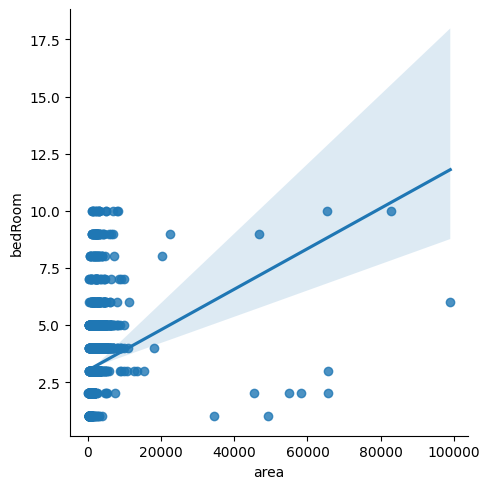

In [166]:
sns.lmplot(data=df,x="area",y="bedRoom")

In [167]:
df["area_room_ratio"] = df["area"]/df["bedRoom"]

In [168]:
df[df["area_room_ratio"]<250]["bedRoom"].value_counts()

bedRoom
2.0     47
3.0     33
5.0     28
6.0     17
4.0     17
9.0     15
8.0     12
7.0      8
10.0     7
Name: count, dtype: int64

In [169]:
df = df[df["area_room_ratio"]>100]

In [170]:
outlier_df = df[(df["area_room_ratio"]<250) & (df["bedRoom"]>3)]

In [171]:
outlier_df["bedRoom"] = round(outlier_df["bedRoom"]/outlier_df["floorNum"])

C:\Users\HP\AppData\Local\Temp\ipykernel_12008\770241914.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outlier_df["bedRoom"] = round(outlier_df["bedRoom"]/outlier_df["floorNum"])


In [172]:
df.update(outlier_df)

In [173]:
df["area_room_ratio"] = df["area"]/df["bedRoom"]

In [174]:
df[(df["area_room_ratio"]<250) & (df["bedRoom"]>4)]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
151,house,independent,manesar,1.10,6173.0,1782.0,Plot area 1782(165.55 sq.m.),8.0,8.0,0,1.0,NaN,New Property,NaN,1782.0,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,222.750000
777,house,independent,sector 17,0.32,5664.0,565.0,Built Up area: 565 (52.49 sq.m.),5.0,1.0,0,1.0,NaN,Undefined,NaN,565.0,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,113.000000
794,house,shivpuri,sector 7,2.80,12444.0,2250.0,Plot area 2250(209.03 sq.m.),10.0,7.0,3,1.0,NaN,Old Property,NaN,2250.0,NaN,1.0,1.0,0.0,1.0,1.0,0.0,0.0,225.000000
1033,house,independent,manesar,0.80,6667.0,1200.0,Plot area 1200(111.48 sq.m.),8.0,8.0,2,1.0,NaN,Relatively New,NaN,1200.0,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,150.000000
1217,house,independent,sector 7,1.16,11717.0,990.0,Carpet area: 110 (91.97 sq.m.),5.0,4.0,2,1.0,North-East,Undefined,NaN,NaN,110.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,198.000000
1233,house,independent,sector 3 phase 2,1.10,10000.0,1100.0,Built Up area: 1100 (102.19 sq.m.)Carpet area:...,5.0,4.0,2,1.0,East,Undefined,NaN,1100.0,900.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,220.000000
1508,house,independent,sector 12,2.50,13889.0,1800.0,Plot area 1800(167.23 sq.m.),9.0,5.0,2,1.0,South-East,Old Property,NaN,1800.0,NaN,0.0,0.0,0.0,1.0,0.0,1.0,8.0,200.000000
1768,house,independent,sector 11,3.50,15556.0,2250.0,Built Up area: 2250 (209.03 sq.m.),10.0,1.0,0,1.0,NaN,New Property,NaN,2250.0,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,225.000000
2032,house,independent,sector 2,0.98,9074.0,1080.0,Carpet area: 120 (100.34 sq.m.),9.0,4.0,3,1.0,South,Undefined,NaN,NaN,120.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,120.000000
2604,house,independent,sector 12,0.65,6500.0,1000.0,Carpet area: 1000 (92.9 sq.m.),6.0,2.0,3,1.0,NaN,Undefined,NaN,NaN,1000.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,166.666667


In [175]:
df[(df["area_room_ratio"]<250) & (df["bedRoom"]>4)].shape

(13, 24)

In [176]:
df.shape

(3569, 24)

In [177]:
df = df[~((df["area_room_ratio"]<250) & (df["bedRoom"]>4))]

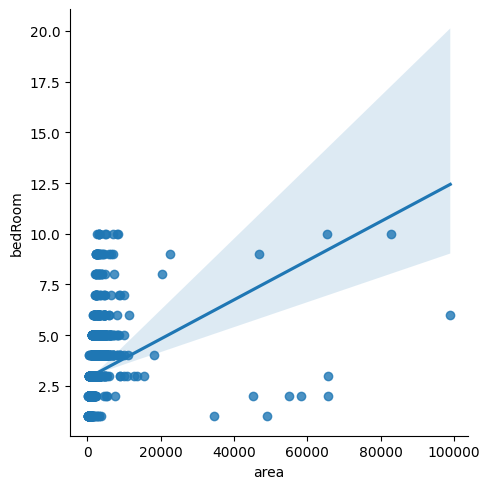

In [178]:
sns.lmplot(data = df,x = "area",y="bedRoom")

In [179]:
df.shape

(3556, 24)

In [180]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
0,flat,signature global grand iva,sector 103,0.50,6667.0,750.0,Built Up area: 750 (69.68 sq.m.)Carpet area: 6...,2.0,2.0,0,10.0,North,Undefined,NaN,750.0,605.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,375.00
1,flat,dlf icon,sector 43,5.80,20707.0,2801.0,Built Up area: 2801 (260.22 sq.m.),4.0,4.0,3+,18.0,NaN,Undefined,NaN,2801.0,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,700.25
3,flat,m3m skywalk,sector 74,1.55,13790.0,1124.0,Super Built up area 1406(130.62 sq.m.)Built Up...,2.0,2.0,3+,18.0,South,Relatively New,1406.0,1300.0,1124.0,0.0,0.0,0.0,0.0,1.0,1.0,137.0,562.00
4,house,dlf city phase 1,sector 26,5.50,30556.0,1800.0,Plot area 200(167.23 sq.m.),4.0,4.0,3,2.0,North-East,Moderately Old,NaN,1800.0,NaN,1.0,1.0,0.0,1.0,0.0,1.0,69.0,450.00
5,flat,tulip violet,sector 69,1.55,9639.0,1608.0,Super Built up area 1608(149.39 sq.m.),3.0,3.0,2,2.0,East,Relatively New,1608.0,NaN,NaN,0.0,0.0,0.0,1.0,0.0,0.0,86.0,536.00


In [181]:
df.to_csv("gurgaon_properties_outlier_treated.csv",index = False)